# Introducción a redes neuronales

## Ejercicio: Neuronas como compuertas lógicas
En este ejercicio experimentaremos con el cómputo de neuronas. Mostraremos cómo representar funciones lógicas básicas como AND, OR y XOR empleando neuronas sencillas (o estructuras más complicadas). Finalmente al final mostraremos cómo representar las redes neuronales como una secuencia de cómputo matricial.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Función sigmoidal:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ tiene un rango (0, 1). Cuando la entrada $x$ es negativa, $\sigma$ tiene un valor cercano a 0. Cuando $x$ es positivo, $\sigma$ tiene un valor cercano a 1. En $x=0$, $\sigma=0.5$

In [6]:
## Quickly define the sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

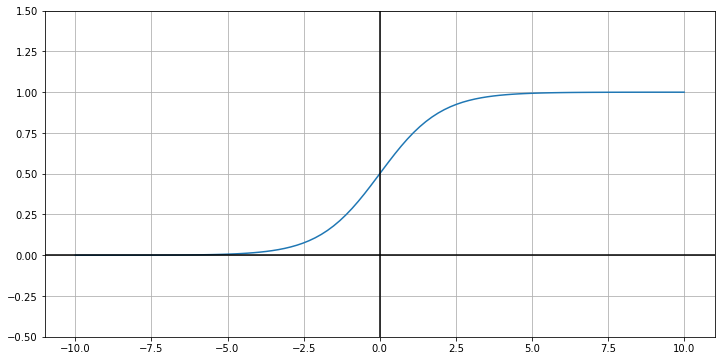

In [7]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

### Conceptualizando las neuronas como compuertas lógicas

Una compuerta lógica toma dos valores booleanos (verdadero/falso o 1/0) como entrada y regresa 0 o 1 dependiendo de sus reglas. La tabla de verdad de una compuerta lógica muestra las salidas para cada combinación de entradas, (0, 0), (0, 1), (1,0), and (1, 1). Por ejemplo, veamos la tabla de verdad de la compuerta "OR":

### Compuerta OR

<table>

<tr>
<th colspan="3">Tabla de verdad compuerta OR</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Una compuerta que usa la función de activaciónn sigmoidal, produce un valor entre (0, 1). Esto nos lleva naturalmente a pensar respecto a valores booleanos. Imagina que una neurona recibe dos entradas $x_1$ and $x_2$ y un término bias:

![](images/logic01.png)

Al limitar las entradas de $x_1$ y $x_2$ a estar en $\left\{0, 1\right\}$, podemos simular el efecto de compuertas lógicas con nuestra neurona. La meta es encontrar los pesos (representados por símbolos ? arriba), de tal forma que regresen una salida cercana a 0 o 1 dependiendo de sus entradas.

¿Qué valores deben tener los pesos para que esta compuerta genere la salidas del operador OR? Recuerda $\sigma(z)$ es cercano a 0 cuando $z$ es un número negativo (cerca de -10 o menos), y es cercano a 1 cuando $z$ es un número positivo (cerca de +10 o más).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Analicemos:

* Cuando $x_1$ y $x_2$ tienen el valor 0, el único valor que afecta a $z$ es $b$. Dado que queremos que el resultado de (0, 0) esté cercano a 0, $b$ debe ser negativo (al menos -10)
* Si $x_1$ o $x_2$ es 1, queremos que la salida esté cercana a 1. Esto significa que los pesos asociados a $x_1$ y $x_2$ deben ser suficientes para contrarrestar $b$ al punto de causar que $z$ sea por lo menos 10.
* Asignemos a $b$ un valor de -10. ¿Qué tan grandes deben ser $w_1$ and $w_2$?
    * Por lo menos +20
* Intentemos $w_1=20$, $w_2=20$, y $b=-10$!

![](images/logic02.png)

In [ ]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [ ]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

<table>

<tr>
<th colspan="3">tabla de verdad OR</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

¡Eso corresponde, excelente! Ahora trata de encontrar los valores apropiados de los pesos para cada tabla de verdad. Evitar usar el método de prueba y error. Piensa de forma lógica y trata de derivar valores que funcionen. 

### Compuerta AND

<table>

<tr>
<th colspan="3">Tabla de verdad compuerta AND</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

## Ejercicio
Determina los valores para las neuronas que harán a esta función una compuerta AND. Valores cercanos a 15 podrían funcionar bien.

In [ ]:
# TO DO: Fill in the w1, w2, and b parameters such that the truth table matches
#and_gate = logic_gate(0,0,0)
and_gate = logic_gate(15,15, -20)

test(and_gate)

## Ejercicio
Realiza el mismo procedimiento para calcular los valores de los pesos de las compuertas NOR y NAND.

### Compuerta NOR (Not Or)

<table>

<tr>
<th colspan="3">Tabla de verdad compuerta NOR</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [ ]:
# TO DO: Fill in the w1, w2, and b parameters such that the truth table matches
#nor_gate = logic_gate(0, 0, 0)
nor_gate = logic_gate(-20, -20, 10)

#nor_gate = logic_gate(-20, -20, 10)
test(nor_gate)

### Compuerta NAND (Not And)

<table>

<tr>
<th colspan="3">Tabla de verdad compuerta NAND</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [ ]:
# TO DO: Fill in the w1, w2, and b parameters such that the truth table matches
#nand_gate = logic_gate(0, 0, 0)
nand_gate = logic_gate(-15, -15, 20)

#nand_gate = logic_gate(-15, -15, 20)
test(nand_gate)

## Los límites de neuronas sencillas

Las compuertas XOR son la base del cómputo. Se emplean como "half-adders" para poder sumar números. A continuación la tabla de verdad de XOR.

### Compuerta XOR (Exclusive Or)

<table>

<tr>
<th colspan="3">Tabla de verdad compuerta XOR</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

¿Es posible definir un conjunto de pesos para definir el operador XOR con una sola neurona?

En realidad no es posible. Una sola neurona no puede correlacionar las entradas. ¿Será posible usar el modelo de cómputo neuronal para formar una compuerta XOR?

Podríamos intentar algo más complejo:

![](images/logic03.png)

Aquí,, tenemos entradas que van a dos compuertas separadas: la neurona superior es una compuerta OR, y la inferior es una compuerta NAND. La salida de estas compuertas se pasan a otra neurona que es AND. Si trabajas las salidas de cada combinación de entradas verás que es una compuerta XOR.


In [ ]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!

def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

## Redes Feedforward Networks como cómputo matricial

El cómputo feed-forward de una red neuronal puede ser considerado cálcula de matrices y funciones de activación. Haremos algunos cálculos con matrices para ver esto en la práctica.

![](images/FF_NN.png)



## Ejercicio
Se provee:

- Tres matrices de pesos `W_1`, `W_2` and `W_3` representando los pesos de cada capa.  La convención en estas matrices $W_{i,j}$ es que el peso de la neurona $i$ en la capa anterior (izquierda) a la neurona $j$ en la siguiente capa (derecha).  
- Un vector `x_in` que representa una sola entrada y una matriz `x_mat_in` que representa 7 entradas distintas.
- Dos funciones: `soft_max_vec` y `soft_max_mat` que aplican la función soft_max function a un solo vector o a una matriz, por renglón.

Las metas de este ejercicio son:
1. Para la entrada `x_in` calcular las entradas y salidas de cada capa (asumiendo funciones de activación sigmoidal para las dos capas intermedias y soft_max para la capa final.
2. Escribir una función que haga el cálculo de la red neuronal completa para una sola entrada.
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input. Escribir una función que haga el cálculo completo de la red neuronal para una matriz de entradas, donde cada renglón corresponde a uns sola entrada.
4. Probar las funciones con `x_in` y `x_mat_in`.

In [8]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_1

array([[ 2, -1,  1,  4],
       [-1,  2, -3,  1],
       [ 3, -2, -1,  5]])

In [9]:
W_1[2,0]

3

In [11]:
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])

In [12]:
x_in = np.array([.5,.8,.2])
x_in

array([0.5, 0.8, 0.2])

In [13]:
x_in[2]

0.2

In [14]:
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])
x_mat_in

array([[0.5, 0.8, 0.2],
       [0.1, 0.9, 0.6],
       [0.2, 0.2, 0.3],
       [0.6, 0.1, 0.9],
       [0.5, 0.5, 0.4],
       [0.9, 0.1, 0.9],
       [0.1, 0.8, 0.7]])

In [62]:
x_mat_in.shape

(7, 3)

In [15]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

In [114]:
np.exp(x_mat_in)

array([[1.64872127, 2.22554093, 1.22140276],
       [1.10517092, 2.45960311, 1.8221188 ],
       [1.22140276, 1.22140276, 1.34985881],
       [1.8221188 , 1.10517092, 2.45960311],
       [1.64872127, 1.64872127, 1.4918247 ],
       [2.45960311, 1.10517092, 2.45960311],
       [1.10517092, 2.22554093, 2.01375271]])

In [125]:
np.sum(np.exp(x_mat_in),axis=1)

array([5.09566496, 5.38689283, 3.79266432, 5.38689283, 4.78926724,
       6.02437714, 5.34446455])

In [126]:
np.sum(np.exp(x_mat_in),axis=1).reshape(-1,1)

array([[5.09566496],
       [5.38689283],
       [3.79266432],
       [5.38689283],
       [4.78926724],
       [6.02437714],
       [5.34446455]])

In [137]:
np.exp(x_mat_in)/(np.sum(np.exp(x_mat_in),axis=1).reshape(-1,1))

array([[0.3235537 , 0.43675182, 0.23969448],
       [0.20515925, 0.45659032, 0.33825043],
       [0.32204346, 0.32204346, 0.35591307],
       [0.33825043, 0.20515925, 0.45659032],
       [0.34425335, 0.34425335, 0.31149331],
       [0.40827509, 0.18344982, 0.40827509],
       [0.20678796, 0.41641981, 0.37679223]])

## Rutinas generale

In [95]:
def createParameters(W1, W2, W3):
    parameters = {}
    parameters["W1"] = W1
    parameters["W2"] = W2
    parameters["W3"] = W3
    return parameters

In [97]:
params = createParameters(W_1, W_2, W_3)

array([[ 2, -1,  1,  4],
       [-1,  2, -3,  1],
       [ 3, -2, -1,  5]])

## Intel approach

Convertimos x_in de un arreglo (3,) a uno de dos dimensiones (1,3)

In [63]:
x_inc = x_in.reshape(1,-1)

In [106]:
def feedforward_intel(X, parameters):
    W1,W2,W3 = parameters["W1"], parameters["W2"], parameters["W3"]
    Z1=np.dot(X,W1)
    A1=sigmoid(Z1)
    Z2=np.dot(A1,W2)
    A2=sigmoid(Z2)
    Z3=np.dot(A2,W3)
    A3=soft_max_vec(Z3)
    return A3

In [110]:
result = feedforward_intel(x_inc, params)
result

array([[0.72780576, 0.26927918, 0.00291506]])

In [113]:
x_mat_in.shape


(7, 3)

In [109]:
result_2 = feedforward_intel(x_mat_in, params)
result_2

array([[0.09423345, 0.03486522, 0.00037743],
       [0.08362702, 0.05078266, 0.00035478],
       [0.08654163, 0.03793319, 0.00046333],
       [0.06263931, 0.10779543, 0.00062308],
       [0.07771166, 0.05776747, 0.00038097],
       [0.06015008, 0.09587296, 0.00072483],
       [0.07727201, 0.06953114, 0.00035236]])

In [ ]:
## Student to do the calculations below

## Andrew Ng approach

* In the input layer each column represent the values of each cell in the neural network, precisely as it is shown in the diagram.
* The weight matrix is of dimensions (num_cells_layer, num_inputs previous layer)
* b is represented as a matrix (num_cells_layer, 1)


In [108]:
x_in_ng = x_in.reshape(3,1)
x_in_ng

array([[0.5],
       [0.8],
       [0.2]])

In [ ]:
x_mat_in_ng = x_mat_in.T
x_mat_in_ng

In [ ]:
W1_ng = W_1
W1_ng

In [ ]:
W2_ng = W_2
W2_ng

In [ ]:
W3_ng = W_3
W3_ng

z = w.Tx + b

a = sigma(z)

In [ ]:
Z1_ng = np.dot(W1_ng.T, x_in_ng)
Z1_ng

In [ ]:
A1_ng = sigmoid(Z1_ng)
A1_ng

In [ ]:
Z2_ng = np.dot(W2_ng.T, A1_ng)
Z2_ng

In [ ]:
A2_ng = sigmoid(Z2_ng)
A2_ng

In [ ]:
Z3_ng = np.dot(W3_ng.T, A2_ng)
Z3_ng

In [ ]:
A3_ng = soft_max_vec(Z3_ng)
A3_ng

In [ ]:
params = {}
params["W1"] = W_1
params["W2"] = W_2
params["W3"] = W_3

In [ ]:
def feed_forward_single_input(x, params):
    print("x", x.shape)
    print("W1",params["W1"].shape)
    print("W2", params["W2"].shape)
    print("W3", params["W3"].shape)
    
    W1 = params["W1"]
    W2 = params["W2"]
    W3 = params["W3"]
    
    Z1 = np.dot(W1.T, x)
    return Z1

In [ ]:
res = feed_forward_single_input(x_in_ng, params)
res